<a href="https://colab.research.google.com/github/jfernandez37/495Project/blob/main/Directed_consulting_495.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.io as sio
import plotly
import matplotlib.pyplot as plt

In [2]:
stuff=sio.loadmat("iFarmData(2015)_1_28_2019.mat")

In [3]:
#print(stuff)

In [4]:
print(type(stuff))
print(type(stuff['Pr_Crop_US']))

<class 'dict'>
<class 'numpy.ndarray'>


tu


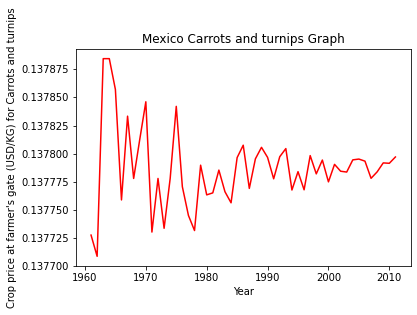

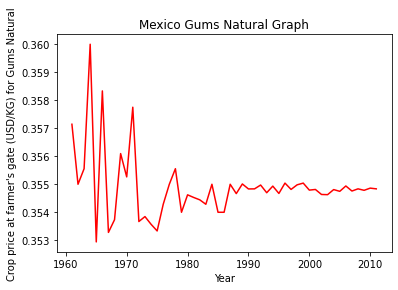

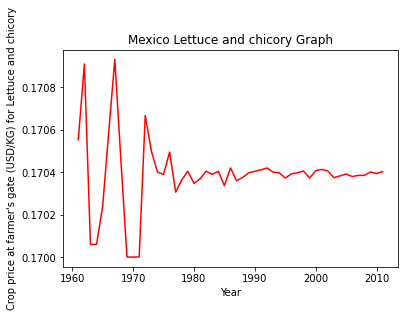

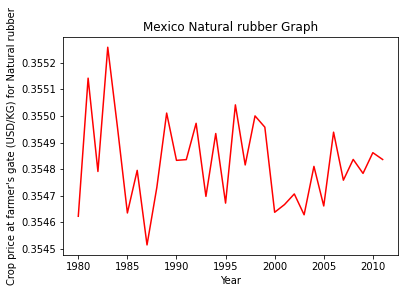

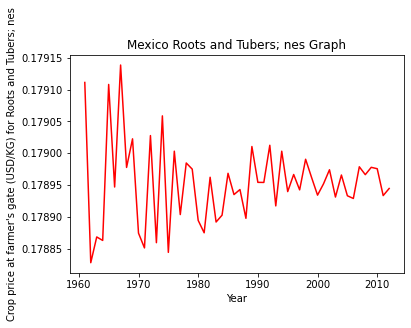

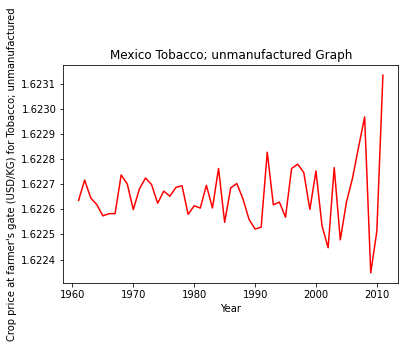

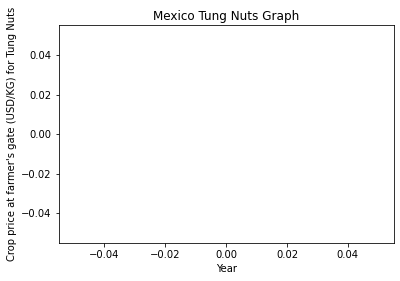

In [45]:
search=str(input())
coID=122
gCount=0
for i in range(169):
  cropID=i
  cropName=str(stuff['FAOSTAT_CrName_FAO'][cropID])
  testSplit=cropName.split("[")
  cropName=testSplit[2].split("]")[0]
  cropName=cropName.replace("'","")
  coName=str(stuff['FAOSTAT_CoName_FAO'][coID])
  testSplitCo=coName.split("[")
  coName=testSplitCo[2].split("]")[0]
  coName=coName.replace("'","")
  #print(cropName)
  if search.upper() in cropName.upper():
    gCount+=1
    y=stuff['Pr_Crop_US'][122][cropID]
    #print(len(stuff['Pr_Crop_US'][0][0]))
    x=np.arange(1961,2016)
    plt.figure(i)
    plt.title(coName+ " "+cropName+ " Graph")
    plt.xlabel("Year")
    plt.ylabel("Crop price at farmer's gate (USD/KG) for " + cropName)
    plt.plot(x,y,color="red")
    plt.show

In [46]:
print("total number of graphs " + str(gCount))

total number of graphs 7


The crop price starts to stabalize around the time that nafta was enacted (1994)

Index for US: 206
Index for Mexico: 122
Index for Canada: 33

55


<function matplotlib.pyplot.show>

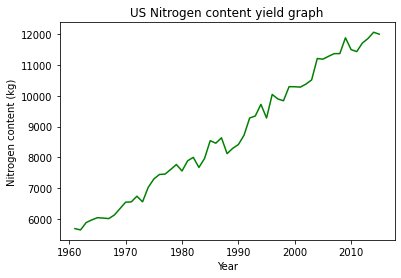

In [8]:
y=stuff['Nyield_kgkm'][206][124]
print(len(stuff['Pr_Crop_US'][0][1]))
x=np.arange(1961,2016)
plt.title("US Nitrogen content yield graph")
plt.xlabel("Year")
plt.ylabel("Nitrogen content (kg)")
plt.plot(x,y,color="green")
plt.show

In [ ]:
y=stuff['netImTrade'][124][5][5]
#print(len(stuff['Pr_Crop_US'][0][1]))
x=np.arange(0,218)
plt.title("Net trade of potatoes in the US")
plt.xlabel("Year")
plt.ylabel("kg of potatoes")
plt.plot(x,y,color="brown")
plt.show

In [ ]:
for i in range(170):
  print(stuff['FAOSTAT_CrName_FAO'][i])
  print("Index" +str(i))

In [35]:
for i in range(209):
  print(stuff['FAOSTAT_CoName_FAO'][i])
  print("Index" +str(i))

[array(['Afghanistan'], dtype='<U11')]
Index0
[array(['Albania'], dtype='<U7')]
Index1
[array(['Algeria'], dtype='<U7')]
Index2
[array(['American Samoa'], dtype='<U14')]
Index3
[array(['Angola'], dtype='<U6')]
Index4
[array(['Antigua and Barbuda'], dtype='<U19')]
Index5
[array(['Argentina'], dtype='<U9')]
Index6
[array(['Armenia'], dtype='<U7')]
Index7
[array(['Australia'], dtype='<U9')]
Index8
[array(['Austria'], dtype='<U7')]
Index9
[array(['Azerbaijan'], dtype='<U10')]
Index10
[array(['Bahamas'], dtype='<U7')]
Index11
[array(['Bahrain'], dtype='<U7')]
Index12
[array(['Bangladesh'], dtype='<U10')]
Index13
[array(['Barbados'], dtype='<U8')]
Index14
[array(['Belarus'], dtype='<U7')]
Index15
[array(['Belgium'], dtype='<U7')]
Index16
[array(['Belgium-Luxembourg'], dtype='<U18')]
Index17
[array(['Belize'], dtype='<U6')]
Index18
[array(['Benin'], dtype='<U5')]
Index19
[array(['Bermuda'], dtype='<U7')]
Index20
[array(['Bhutan'], dtype='<U6')]
Index21
[array(['Bolivia (Plurinational State of